In [1]:
import pandas as pd

df = pd.read_csv('data/dataset_20240513.csv')
df.head()

,O,N,B,S,P,SSA,Smicro,Smeso,Smicro/SSA,PV,...,Vmeso,Vmicro/PV,Dap,ID/IG,Elyte,CC,AML,PW,CD,Cs
0,7.15,3.52,0.00,0.0,0.0,1546.1,NaN,NaN,NaN,0.5753,...,0.03714,0.939857,1.488390,1.029,2M ZnSO4,carbon cloth,1.0,1.6,0.10,85.0
1,8.12,3.79,3.66,0.0,0.0,1315.2,NaN,NaN,NaN,0.5116,...,0.05106,0.931392,1.555961,1.038,2M ZnSO4,carbon cloth,1.0,1.6,0.10,114.0
2,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.10,90.2
3,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.25,86.3
4,21.55,3.29,0.00,0.0,0.0,1140.8,341.3,799.5,0.299176,0.8600,...,0.68000,0.209302,3.015428,0.820,1M Zn(CF3SO3)2,stainless-steel mesh,2.5,1.8,0.50,79.9


                   O         N         B         S         P       SSA  \
O           1.000000  0.023813 -0.084410  0.117118  0.016434 -0.018586   
N           0.023813  1.000000 -0.019767 -0.124662  0.128738 -0.340437   
B          -0.084410 -0.019767  1.000000 -0.053617 -0.039189 -0.050622   
S           0.117118 -0.124662 -0.053617  1.000000 -0.043207  0.106397   
P           0.016434  0.128738 -0.039189 -0.043207  1.000000 -0.019402   
SSA        -0.018586 -0.340437 -0.050622  0.106397 -0.019402  1.000000   
Smicro      0.302497 -0.177848 -0.056157 -0.125577  0.075412  0.661314   
Smeso      -0.164746 -0.261759 -0.036122 -0.046511 -0.102422  0.780464   
Smicro/SSA  0.317844  0.183334 -0.003066 -0.158379  0.110889 -0.230398   
PV         -0.268670 -0.266784 -0.085449 -0.001046 -0.021917  0.682151   
Vmicro      0.278571 -0.300454 -0.110060  0.081873 -0.022871  0.719634   
Vmeso      -0.342192 -0.176492 -0.071046 -0.087852 -0.034531  0.294068   
Vmicro/PV   0.191814 -0.033634  0.0365

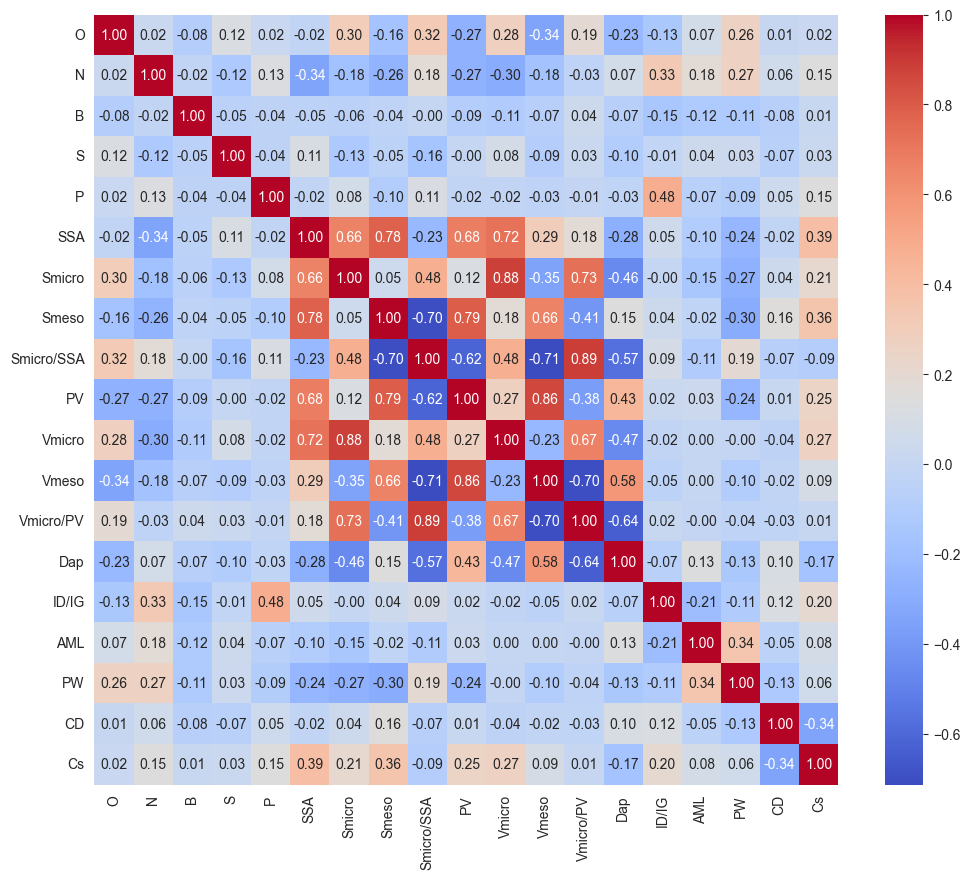

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['Elyte', 'CC'], axis=1)
# 计算相关系数
corr = df.corr()
print(corr
      )
# 创建一个新的matplotlib图像
plt.figure(figsize=(12,10))

# 生成热力图
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.savefig('output/figures/pearson_corr.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [3]:
# 找出相关系数大于0.8的特征对
highly_correlated_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.75:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            highly_correlated_features.append((colname1, colname2))

print(highly_correlated_features)

[('Smeso', 'SSA'), ('PV', 'Smeso'), ('Vmicro', 'Smicro'), ('Vmeso', 'PV'), ('Vmicro/PV', 'Smicro/SSA')]


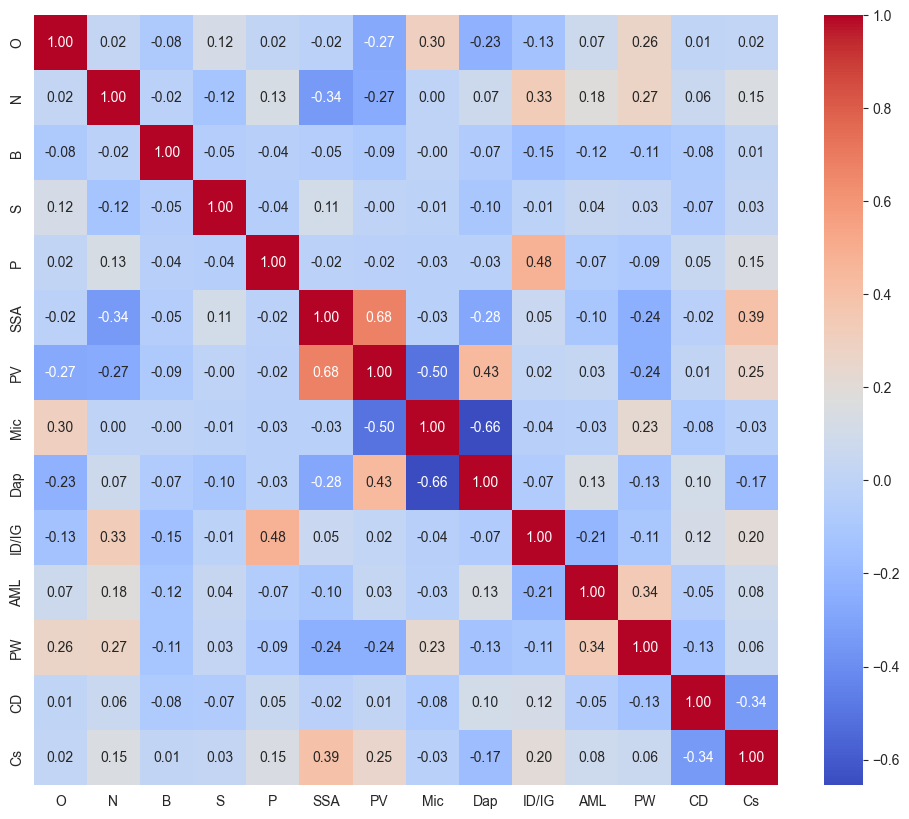

In [4]:
df_1 = pd.read_csv('data/dataset_1.csv')
df_1 = df_1.drop(['Elyte', 'CC'], axis=1)
# 计算相关系数
corr_1 = df_1.corr()

# 创建一个新的matplotlib图像
plt.figure(figsize=(12,10))

# 生成热力图
sns.heatmap(corr_1, annot=True, fmt=".2f", cmap='coolwarm')

plt.savefig('output/figures/pearson_corr_1.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [5]:
# 找出相关系数大于0.75的特征对
highly_correlated_features_1 = []
for i in range(len(corr_1.columns)):
    for j in range(i):
        if abs(corr_1.iloc[i, j]) > 0.75:
            colname1 = corr_1.columns[i]
            colname2 = corr_1.columns[j]
            highly_correlated_features_1.append((colname1, colname2))

print(highly_correlated_features_1)

[]
